In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [97]:
class CNN_Classifier(nn.Module):
    def __init__(self):
        super(CNN_Classifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(1040, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [86]:
training_data = datasets.CIFAR10(
    root="./datasets",
    train=True,
    download=False,
    transform=ToTensor()
)
epochs = 1

In [98]:
classifier = CNN_Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(classifier.parameters(), lr=0.001, momentum=0.9)
for i in range(epochs):
    optimizer.zero_grad()
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    target_idx_list = training_data.targets
    target_idx = np.random.choice(np.where(np.array(target_idx_list) == label)[0])
    target_img, target_label = training_data[target_idx]
    # input = img
    input = torch.cat((img, target_img), 1)
    print(classifier(input))


tensor([ 0.0322,  0.1173,  0.0628, -0.0200, -0.0545,  0.0706,  0.0638, -0.0322,
        -0.0075,  0.0641], grad_fn=<AddBackward0>)


In [81]:
print(img.size())

torch.Size([3, 32, 32])


In [37]:
torch.cat((img, target_img), 2).size()

torch.Size([3, 32, 64])

torch.Size([6, 32, 32])

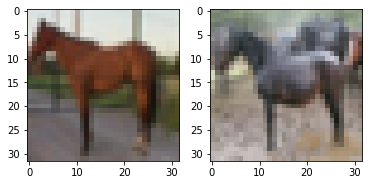

In [22]:


# img = img.permute(1,2,0)
# target_img = target_img.permute(1,2,0)
# f, axarr = plt.subplots(1,2)
# axarr[0].imshow(img.squeeze(), cmap="gray")
# axarr[1].imshow(target_img.squeeze(), cmap="gray")

# plt.show()

